# Clasificación de variedades de trigo
https://www.kaggle.com/datasets/sudhanshu2198/wheat-variety-classification
## Información del conjunto de datos
El conjunto de datos comprende granos de trigo pertenecientes a tres variedades diferentes: Kama, Rosa y Canadian, con 70 elementos cada una. Todos estos parámetros fueron de valor real continuo.
## Información de atributos
Para construir los datos, se midieron siete parámetros geométricos de los granos de trigo: área A, perímetro P, compacidad $C = 4pi*A/P^2$, longitud del grano, ancho del grano, coeficiente de asimetría y longitud del surco del grano.

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ragatti/tuia/blob/mineriadedatos/TPs/TP1/tp1.ipynb)

[![View source on GitHub!](https://badgen.net/badge/icon/View%20on%20Github?icon=github&label)](https://github.com/ragatti/tuia/blob/mineriadedatos/TPs/TP1/tp1.ipynb)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import MDS, Isomap, TSNE

In [ ]:
df = pd.read_csv("wheat.csv")
target_names = {
    1:'Kama',
    2:'Rosa',
    3:'Canadian'
}

df['category'] = df['category'].astype('category').map(target_names)

## Análisis exploratorio

In [ ]:
df.shape

(210, 8)

In [ ]:
df.head()

,area,perimeter,compactness,length,width,asymmetry coefficient,groove length,category
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,Kama
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,Kama
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,Kama
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,Kama
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,Kama


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   area                   210 non-null    float64 
 1   perimeter              210 non-null    float64 
 2   compactness            210 non-null    float64 
 3   length                 210 non-null    float64 
 4   width                  210 non-null    float64 
 5   asymmetry coefficient  210 non-null    float64 
 6   groove length          210 non-null    float64 
 7   category               210 non-null    category
dtypes: category(1), float64(7)
memory usage: 11.9 KB


In [ ]:
df.describe()

,area,perimeter,compactness,length,width,asymmetry coefficient,groove length
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


In [ ]:
# Chequeo de datos null
df.isnull().sum()

,0
area,0
perimeter,0
compactness,0
length,0
width,0
asymmetry coefficient,0
groove length,0
category,0


In [ ]:
df["category"].value_counts()

,count
category,
Kama,70
Rosa,70
Canadian,70


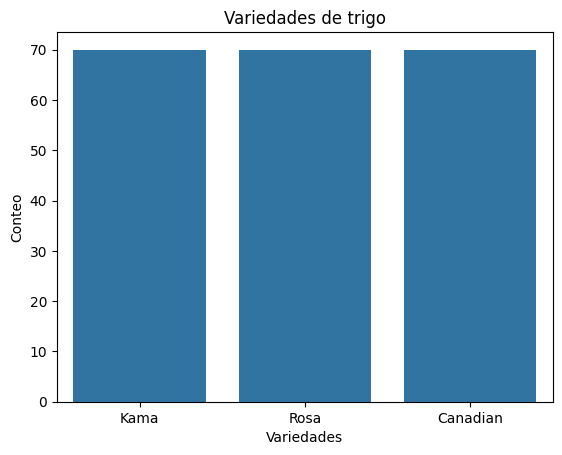

In [ ]:
sns.countplot( x="category", data=df)
plt.title('Variedades de trigo')
plt.xlabel('Variedades')
plt.ylabel('Conteo')
plt.show()

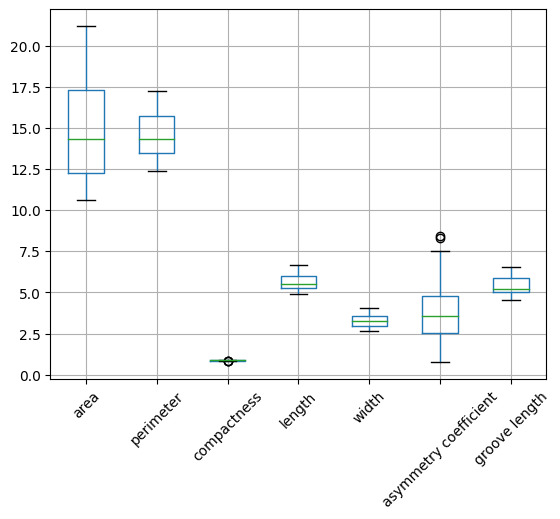

In [ ]:
df.boxplot(rot=45)
plt.show()

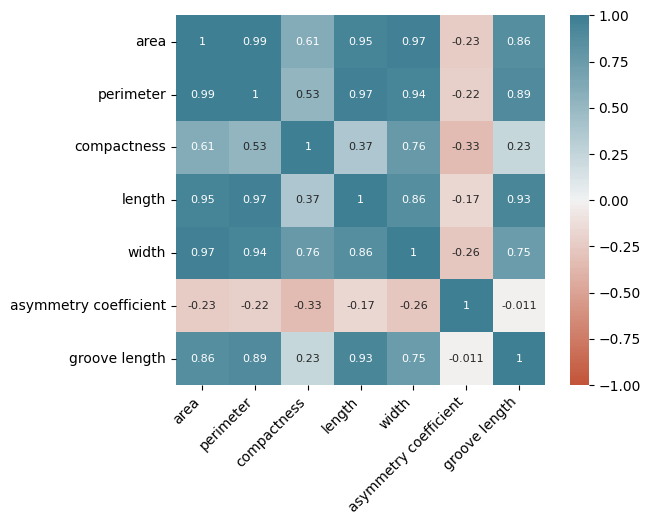

In [ ]:
corr = df.drop(['category'], axis=1).corr()
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot = True,
    annot_kws = {'size': 8}
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.show()

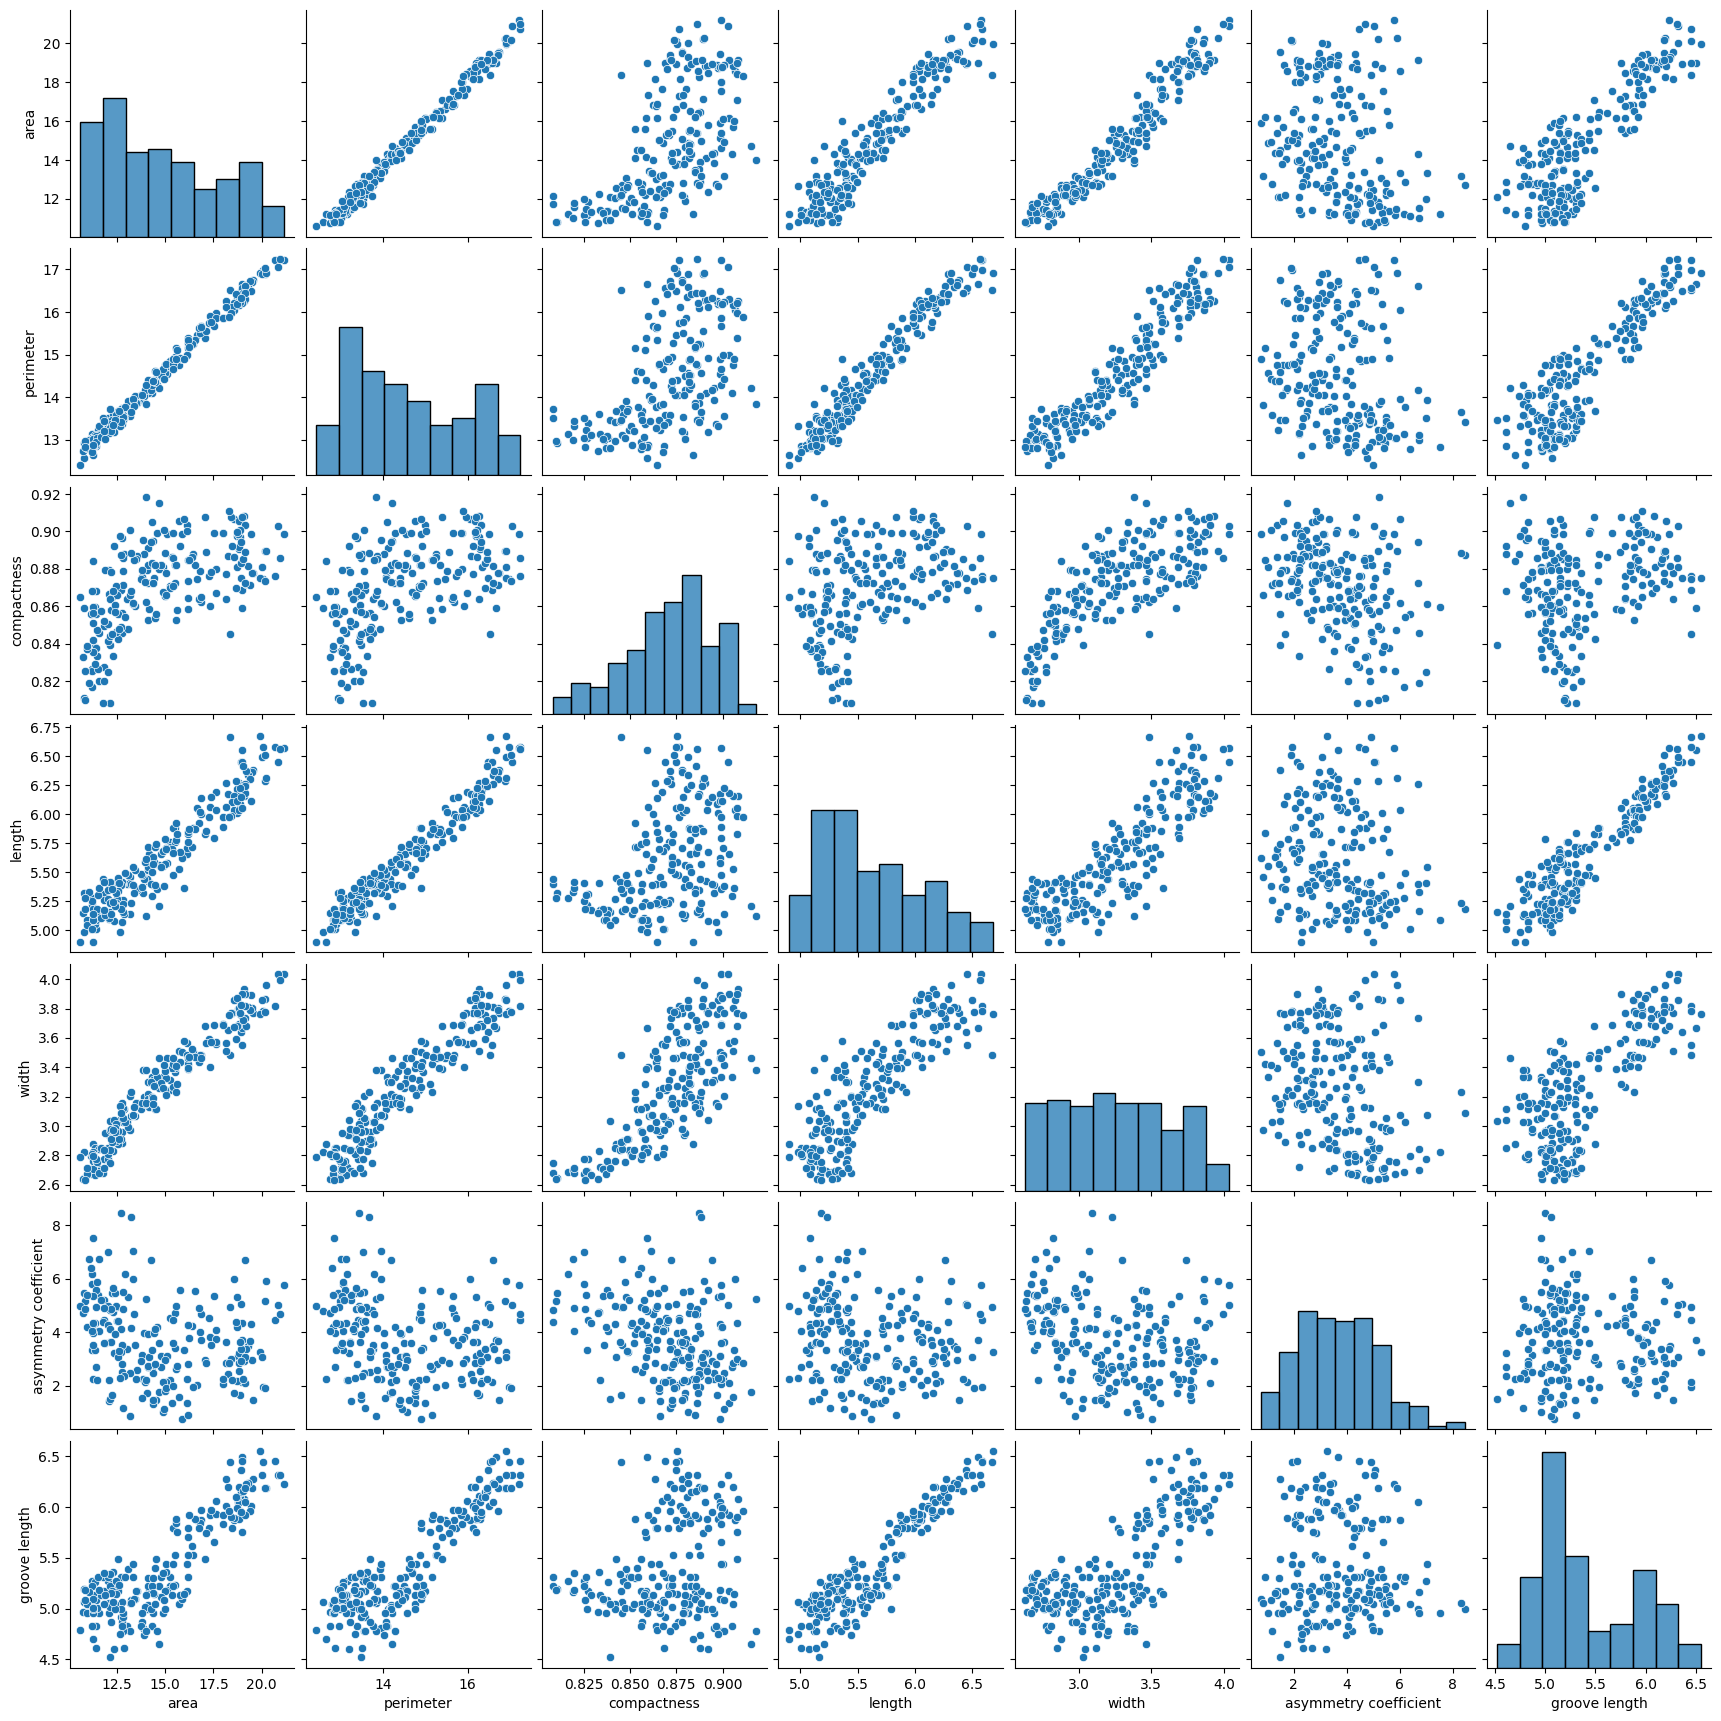

In [ ]:
sns.pairplot(df)
plt.show()

## Estandarización o Z-score
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler

In [ ]:
df_x = df.drop(['category'], axis=1)
df_y = df['category']
#df_std = (df_x-df_x.mean())/df_x.std()
scaler = StandardScaler().set_output(transform="pandas")
df_std = scaler.fit_transform(df_x)
df_std.shape

(210, 7)

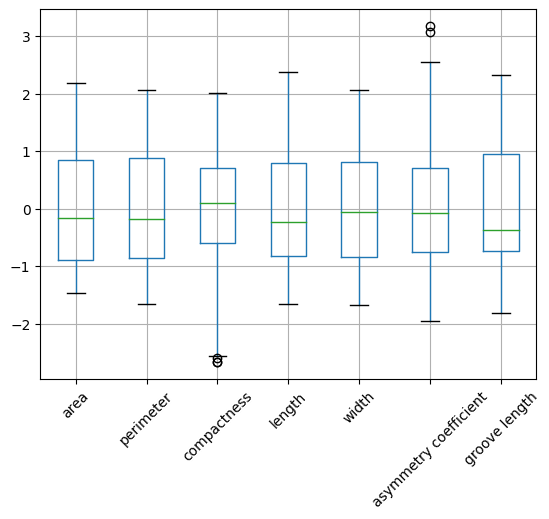

In [ ]:
df_std.boxplot(rot=45)
plt.show()

## Outliers

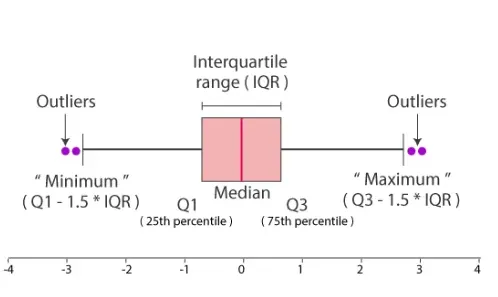

In [ ]:
# IQR
# Columnas con outliers
outliers_col = ["compactness", "asymmetry coefficient"]
# limite mayor y menor
for col in outliers_col:
    Q1 = df_x[col].quantile(0.25)
    Q3 = df_x[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR

    # Arreglo de booleanos que indican las filas con outlaiers
    upper_array = np.where(df_x[col] >= upper)[0]
    lower_array = np.where(df_x[col] <= lower)[0]

    # Reemplazo de outliers por la media
    df_x[col][upper_array] = df_x[col].mean()
    df_x[col][lower_array] = df_x[col].mean()

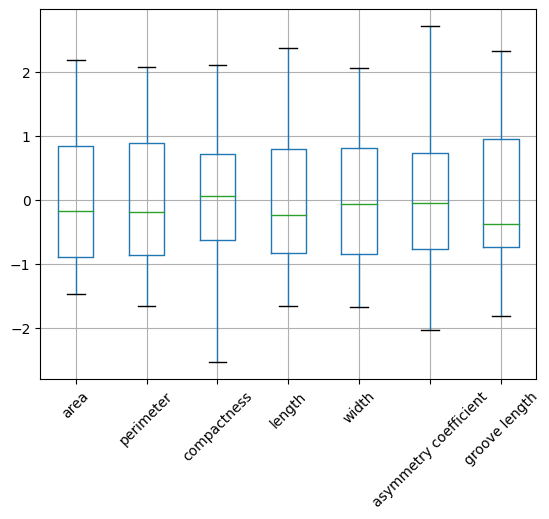

In [ ]:
df_std = scaler.fit_transform(df_x)
df_std.boxplot(rot=45)
plt.show()

## Multi-dimensional Scaling (MDS)
https://scikit-learn.org/stable/modules/manifold.html#multi-dimensional-scaling-mds


In [ ]:
mds = MDS(n_components=3, normalized_stress=False, random_state=42)
X_reduced_mds = mds.fit_transform(df_std)
print(X_reduced_mds.shape)

mds_df = pd.DataFrame(
    data=X_reduced_mds,
    columns=['C1', 'C2', 'C3'])
mds_df['category'] = df['category']

(210, 3)


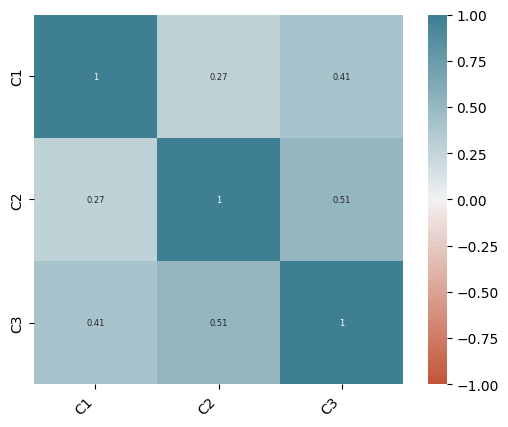

In [ ]:
corr = mds_df[['C1', 'C2', 'C3']].corr()
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot = True,
    annot_kws = {'size': 6})
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right')
plt.show()

In [ ]:
fig = px.scatter(X_reduced_mds, x=0, y=1, color = df_y,
                 labels={'color': 'category'})
fig.show()

fig = px.scatter_3d(X_reduced_mds, x=0, y=1, z=2,
    color=df_y, labels={'color': 'category'})
fig.update_traces(marker_size=5)
fig.show()

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:1971: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:1971: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



## Isometric Mapping (Isomap)
https://scikit-learn.org/stable/modules/manifold.html#isomap

In [ ]:
isomap = Isomap(n_components=3)
X_reduced_isomap = isomap.fit_transform(df_std)
print(X_reduced_isomap.shape)

isomap_df = pd.DataFrame(
    data=X_reduced_isomap,
    columns=['C1', 'C2', 'C3'])
isomap_df['category'] = df['category']

(210, 3)


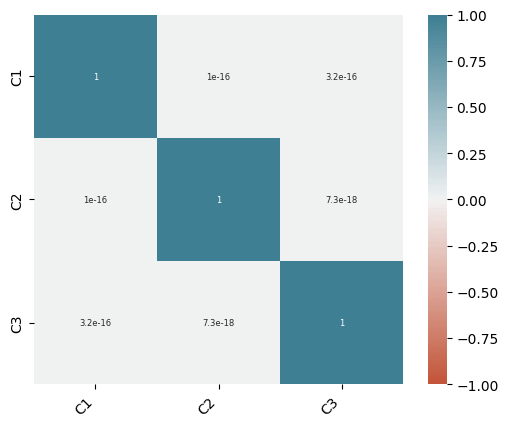

In [ ]:
corr = isomap_df[['C1', 'C2', 'C3']].corr()
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot = True,
    annot_kws = {'size': 6})
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right')
plt.show()

In [ ]:
fig = px.scatter(X_reduced_isomap, x=1, y=2, color = df_y,
                 labels={'color': 'category'})
fig.show()

fig = px.scatter_3d(
    X_reduced_isomap, x=0, y=1, z=2,
    color=df['category'], labels={'color': 'category'})
fig.update_traces(marker_size=5)
fig.show()

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:1971: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:1971: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



## t-distributed Stochastic Neighbor Embedding (t-SNE)
https://scikit-learn.org/stable/modules/manifold.html#t-distributed-stochastic-neighbor-embedding-t-sne

In [ ]:
tsne = TSNE(n_components=3, init="random", learning_rate="auto",
            random_state=42)
X_reduced_tsne = tsne.fit_transform(df_std)
print(X_reduced_tsne.shape)

tsne_df = pd.DataFrame(
    data=X_reduced_tsne,
    columns=['C1', 'C2', 'C3'])
tsne_df['category'] = df['category']


(210, 3)


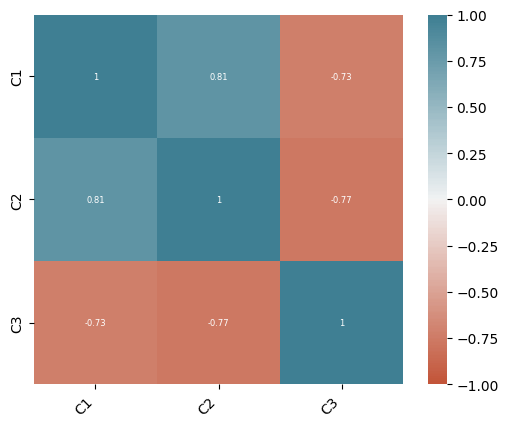

In [ ]:
corr = tsne_df[['C1', 'C2', 'C3']].corr()
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot = True,
    annot_kws = {'size': 6})
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right')
plt.show()

In [ ]:
fig = px.scatter(X_reduced_tsne, x=0, y=1, color = df_y,
                 labels={'color': 'category'})
fig.show()

fig = px.scatter_3d(
    X_reduced_tsne, x=0, y=1, z=2,
    color=df['category'], labels={'color': 'category'}
)
fig.update_traces(marker_size=5)
fig.show()

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:1971: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:1971: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



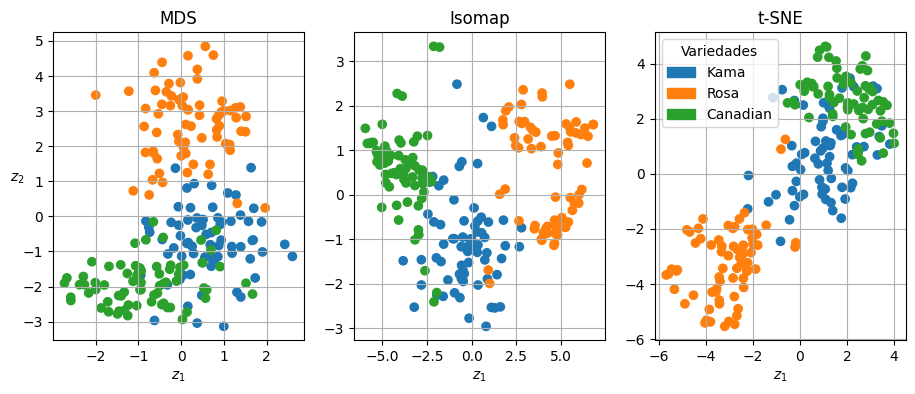

In [ ]:
titles = ["MDS", "Isomap", "t-SNE"]

plt.figure(figsize=(11, 4))
levels, categories = pd.factorize(df_y)
colors = [plt.cm.tab10(i) for i in levels]
handles = [matplotlib.patches.Patch(color=plt.cm.tab10(i), label=c)
           for i, c in enumerate(categories)]

for subplot, title, X_reduced in zip((131, 132, 133), titles,
                                     (X_reduced_mds, X_reduced_isomap,
                                      X_reduced_tsne)):
    plt.subplot(subplot)
    plt.title(title)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=colors)
    plt.xlabel("$z_1$")
    if subplot == 131:
        plt.ylabel("$z_2$", rotation=0)
    plt.grid(True)

plt.legend(handles=handles, title='Variedades')

plt.show()

##  Uniform Manifold Approximation and Projection (UMAP)
https://umap-learn.readthedocs.io/en/latest/

In [ ]:
pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 2.9 MB/s eta 0:00:00


In [ ]:
import umap

In [ ]:
umap_2d = umap.UMAP(n_components=2, init='random', random_state=0)
umap_3d = umap.UMAP(n_components=3, init='random', random_state=0)

proj_2d = umap_2d.fit_transform(df_std)
proj_3d = umap_3d.fit_transform(df_std)

fig_2d = px.scatter(
    proj_2d, x=0, y=1,
    color=df['category'], labels={'color': 'category'}
)
fig_3d = px.scatter_3d(
    proj_3d, x=0, y=1, z=2,
    color=df['category'], labels={'color': 'category'}
)
fig_3d.update_traces(marker_size=5)

fig_2d.show()
fig_3d.show()

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:1971: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:1971: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

